<a href="https://colab.research.google.com/github/EtiPeretz/Supervised-Learning/blob/main/Assignment_1_DEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Section 1: Data Science

Load the flights training data into 'data'.

In [ ]:
!git clone https://github.com/kfirbar/course-ml-data

data = pd.read_csv('/content/course-ml-data/flight_delays_train.csv')


fatal: destination path 'course-ml-data' already exists and is not an empty directory.


How many flights got delayed at Charlotte?

In [ ]:
# TODO:
# TODO: 
CLT_flights = data[data['Origin'] == "CLT"]
CLT_flights

#CLT_flights[CLT_flights['dep_delayed_15min'] == "Y"].head()
#CLT_flights['dep_delayed_15min'].value_counts()

print(CLT_flights['dep_delayed_15min'].value_counts().loc['Y'])

288


Show the number of departures per hour-of-day.

In [ ]:
# TODO: 

data['DepHour'] = data["DepTime"]% 2400 
data['DepHour'] = data["DepHour"] // 100 
data.groupby('DepHour').DepTime.count()


DepHour
0      331
1       82
2       27
3        8
4       38
5     1636
6     6315
7     6329
8     6620
9     6409
10    6363
11    6340
12    6363
13    6178
14    6006
15    6170
16    6112
17    6562
18    6110
19    5500
20    4430
21    3505
22    1787
23     779
Name: DepTime, dtype: int64

Plot number of departures (Y axis) per hour-of-day (X axis).

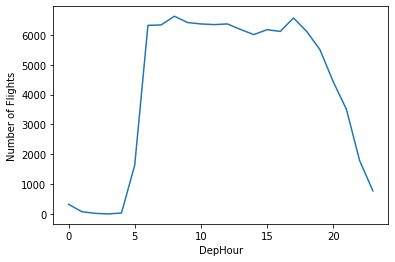

In [ ]:
# TODO: 
data.groupby('DepHour').DepTime.count().plot(xlabel = 'DepHour', ylabel='Number of Flights')


Plot the average number of delays per hour-of-day.

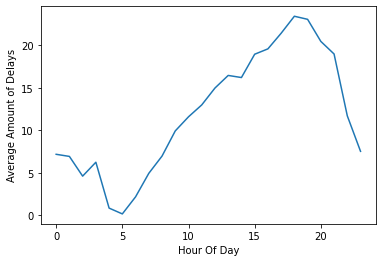

In [ ]:
# TODO: 
averages = []
dep_times = data.groupby("DepHour")
for name , group in dep_times:
  delayed = group[group['dep_delayed_15min']== 'Y'].size
  sum_days = group.groupby(['Month', 'DayofMonth', 'DayOfWeek']).size()
  averages.append(delayed / sum_days.size)
plt.plot(averages)
plt.xlabel('Hour Of Day')
plt.ylabel('Average Amount of Delays')
plt.show()



Find the worse pair of origin and carrier (max number of delays)

In [ ]:
# TODO: 

# You may want to use 'idxmax' (like argmax, returning the row with max value of specific column)
worst_pair_data = data.groupby(['Origin', 'UniqueCarrier']).dep_delayed_15min.count()
worst_pair_data.idxmax()


('ATL', 'DL')

# Section 2: Supervised Learning
Here, you are requested to use all features to predict the response parameter dep_delayed_15min.

* Note: some of those things are covered in notebooks 1-4.

In [ ]:
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


In [ ]:
# filtering out the columns we don't need for one-hot-encoding --> 'Distance', 'DepTime'
data = pd.read_csv('/content/course-ml-data/flight_delays_train.csv')
X = copy.deepcopy(data)

X['dep_delayed_15min'].replace({'Y': 1, 'N': 0}, inplace=True)
X = X.dropna()

# encoding the categorial features and concat everything with X
X = pd.concat([X, pd.get_dummies(X['Month'], prefix='Month')], axis=1)
X = pd.concat([X, pd.get_dummies(X['DayofMonth'], prefix='DayofMonth')], axis=1)
X = pd.concat([X, pd.get_dummies(X['DayOfWeek'], prefix='DayOfWeek')], axis=1)
X = pd.concat([X, pd.get_dummies(X['UniqueCarrier'], prefix='UniqueCarrier')], axis=1)
X = pd.concat([X, pd.get_dummies(X['Origin'], prefix='Origin')], axis=1)
X = pd.concat([X, pd.get_dummies(X['Dest'], prefix='Dest')], axis=1)

# remove originals from X
X = X.drop(columns=['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest'], axis=1)

# checking NaNs
# X.isnull().any(axis=1)
# X.isnull().any(axis=0)
# No NaNs in data

X.head(1)



,DepTime,Distance,dep_delayed_15min,Month_c-1,Month_c-10,Month_c-11,Month_c-12,Month_c-2,Month_c-3,Month_c-4,Month_c-5,Month_c-6,Month_c-7,Month_c-8,Month_c-9,DayofMonth_c-1,DayofMonth_c-10,DayofMonth_c-11,DayofMonth_c-12,DayofMonth_c-13,DayofMonth_c-14,DayofMonth_c-15,DayofMonth_c-16,DayofMonth_c-17,DayofMonth_c-18,DayofMonth_c-19,DayofMonth_c-2,DayofMonth_c-20,DayofMonth_c-21,DayofMonth_c-22,DayofMonth_c-23,DayofMonth_c-24,DayofMonth_c-25,DayofMonth_c-26,DayofMonth_c-27,DayofMonth_c-28,DayofMonth_c-29,DayofMonth_c-3,DayofMonth_c-30,DayofMonth_c-31,...,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SOP,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SWF,Dest_SYR,Dest_TEX,Dest_TLH,Dest_TOL,Dest_TPA,Dest_TRI,Dest_TTN,Dest_TUL,Dest_TUP,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TXK,Dest_TYR,Dest_TYS,Dest_VCT,Dest_VIS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YUM
0,1934,732,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Splitting the data to train and test using sklearn --> test_size=0.3, random_state=1 

y = X['dep_delayed_15min']
X = X.drop(columns='dep_delayed_15min')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
# Fitting a LogisticRegression classifier to the training set
lr = LogisticRegression(max_iter=600)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Printing confusion matrix over the testing set
y_hat_test = lr.predict(X_test)
confusion_matrix(y_test, y_hat_test)

array([[24149,   265],
       [ 5261,   325]])

In [ ]:
# Calculating Precision, Recall and F score
precision = precision_score(y_test, y_hat_test, average='macro')
recall = recall_score(y_test, y_hat_test, average='macro')
f1 = f1_score(y_test, y_hat_test, average='macro')
accuracy = accuracy_score(y_test, y_hat_test)
print(f'LogisticRegression -> Precision Score: ' + str(precision))
print(f'LogisticRegression -> Recall Score: ' + str(recall))
print(f'LogisticRegression -> F Score: ' + str(f1))
print(f'LogisticRegression -> Accuracy Score: ' + str(accuracy))

LogisticRegression -> Precision Score: 0.6859813622715668
LogisticRegression -> Recall Score: 0.5236633697081943
LogisticRegression -> F Score: 0.5012890795869709
LogisticRegression -> Accuracy Score: 0.8158


In [ ]:
# TODO: Similarly, print precision/recall for the following classifiers:

# sklearn.naive_bayes.BernoulliNB
# sklearn.neighbors.KNeighborsClassifier
# sklearn.svm.LinearSVC

clf = BernoulliNB()
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
precision = precision_score(y_test, y_hat_test, average='macro')
recall = recall_score(y_test, y_hat_test, average='macro')
f1 = f1_score(y_test, y_hat_test, average='macro')
accuracy = accuracy_score(y_test, y_hat_test)
print(f'BernoulliNB -> Precision Score: ' + str(precision))
print(f'BernoulliNB -> Recall Score: ' + str(recall))
print(f'BernoulliNB -> F Score: ' + str(f1))
print(f'BernoulliNB -> Accuracy Score: ' + str(accuracy))
print("")

clf = LinearSVC(dual=False)
clf.fit(X_train, y_train)
y_hat_test = clf.predict(X_test)
precision = precision_score(y_test, y_hat_test, average='macro')
recall = recall_score(y_test, y_hat_test, average='macro')
f1 = f1_score(y_test, y_hat_test, average='macro')
accuracy = accuracy_score(y_test, y_hat_test)
print(f'LinearSVC -> Precision Score: ' + str(precision))
print(f'LinearSVC -> Recall Score: ' + str(recall))
print(f'LinearSVC -> F Score: ' + str(f1))
print(f'LinearSVC -> Accuracy Score: ' + str(accuracy))
print("")

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_hat_test = neigh.predict(X_test)
precision = precision_score(y_test, y_hat_test, average='macro')
recall = recall_score(y_test, y_hat_test, average='macro')
f1 = f1_score(y_test, y_hat_test, average='macro')
accuracy = accuracy_score(y_test, y_hat_test)
print(f'KNeighborsClassifier -> Precision Score: ' + str(precision))
print(f'KNeighborsClassifier -> Recall Score: ' + str(recall))
print(f'KNeighborsClassifier -> F Score: ' + str(f1))
print(f'KNeighborsClassifier -> Accuracy Score: ' + str(accuracy))


BernoulliNB -> Precision Score: 0.5665767847971238
BernoulliNB -> Recall Score: 0.503832387555273
BernoulliNB -> F Score: 0.46189360039775557
BernoulliNB -> Accuracy Score: 0.8106

LinearSVC -> Precision Score: 0.706036606269294
LinearSVC -> Recall Score: 0.5053721311318179
LinearSVC -> F Score: 0.46121582851625564
LinearSVC -> Accuracy Score: 0.8145666666666667

KNeighborsClassifier -> Precision Score: 0.615362708373873
KNeighborsClassifier -> Recall Score: 0.5600949412114705
KNeighborsClassifier -> F Score: 0.566777104526746
KNeighborsClassifier -> Accuracy Score: 0.796
